In [95]:
import pandas as pd
from pandas import DataFrame

from PAD.PAD_08.PAD_08 import correlation_matrix

df = pd.read_csv('data/country_vaccinations.csv')
# //filter Poland from colum country
df[df['country'] == 'Poland']

country iso_code        date  total_vaccinations  people_vaccinated  \
62294  Poland      POL  2020-12-28              2000.0             2000.0   
62295  Poland      POL  2020-12-29              6300.0             6300.0   
62296  Poland      POL  2020-12-30             36300.0            36300.0   
62297  Poland      POL  2020-12-31             47600.0            47600.0   
62298  Poland      POL  2021-01-01                 NaN                NaN   
...       ...      ...         ...                 ...                ...   
62746  Poland      POL  2022-03-25          53870219.0         22580485.0   
62747  Poland      POL  2022-03-26          53880551.0         22582082.0   
62748  Poland      POL  2022-03-27          53882175.0         22582308.0   
62749  Poland      POL  2022-03-28                 NaN                NaN   
62750  Poland      POL  2022-03-29          53908363.0         22585418.0   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
62294                      NaN                     NaN                 NaN   
62295                      NaN                  4300.0              4300.0   
62296                      NaN                 30000.0             17150.0   
62297                      NaN                 11300.0             15200.0   
62298                      NaN                     NaN             11749.0   
...                        ...                     ...                 ...   
62746               22335445.0                 26292.0             16568.0   
62747               22338081.0                 10332.0             14805.0   
62748               22338384.0                  1624.0             14721.0   
62749                      NaN                     NaN             14467.0   
62750               22343826.0                     NaN             14141.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
62294                            0.01                           0.01   
62295                            0.02                           0.02   
62296                            0.10                           0.10   
62297                            0.13                           0.13   
62298                             NaN                            NaN   
...                               ...                            ...   
62746                          142.53                          59.74   
62747                          142.55                          59.75   
62748                          142.56                          59.75   
62749                             NaN                            NaN   
62750                          142.63                          59.75   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
62294                                  NaN                             NaN   
62295                                  NaN                           114.0   
62296                                  NaN                           454.0   
62297                                  NaN                           402.0   
62298                                  NaN                           311.0   
...                                    ...                             ...   
62746                                59.09                           438.0   
62747                                59.10                           392.0   
62748                                59.10                           389.0   
62749                                  NaN                           383.0   
62750                                59.12                           374.0   

                                                vaccines         source_name  \
62294  Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...  Ministry of Health   
62295  Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...  Ministry of Health   
62296  Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...  Ministry of Health   
62297  Johnson&Johnson

In [94]:
df.head()


country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            34.0   
2                                  NaN                            34.0   
3                                  NaN                            34.0   
4                                  NaN                            34.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name            source_website  
0  World Health Organization  https://covid19.who.int/  
1  World Health Organization  https://covid19.who.int/  
2  World Health Organization  https://covid19.who.int/  
3  World Health Organization  https://covid19.who.int/  
4  World Health Organization  https://covid19.who.int/

In [96]:
df.describe()
df.columns


Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [97]:
def combine_unique_values(series):
    return ', '.join(series.dropna().unique())


agg_df = df.groupby('country').agg({
    'total_vaccinations': 'max',
    'people_vaccinated': 'max',
    'people_fully_vaccinated': 'max',
    'daily_vaccinations_raw': 'sum',
    'daily_vaccinations': 'sum',
    'total_vaccinations_per_hundred': 'max',
    'people_vaccinated_per_hundred': 'max',
    'people_fully_vaccinated_per_hundred': 'max',
    'daily_vaccinations_per_million': 'mean',
    'vaccines': combine_unique_values,
    'source_name': combine_unique_values,
    'source_website': combine_unique_values
}).reset_index()

In [98]:
agg_df.rename(columns=lambda x: x.strip(), inplace=True)

In [19]:
# import plotly.express as px
#
# fig = px.choropleth(
#     agg_df,
#     locations="country",
#     locationmode="country names",
#     color="total_vaccinations",
#     title="Heatmap of Total Vaccinations by Country",
#     color_continuous_scale="OrRd",
#     labels={"total_vaccinations": "Total Vaccinations"},
# )
#
# fig.update_geos(showframe=False, showcoastlines=False, projection_type="equirectangular")
# fig.show()

ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['total_vaccinations', 'people_vaccinated', 'daily_vaccinations_raw', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million', 'daily_vaccinations', 'vaccines', 'source_name', 'source_website'] but received: country

In [99]:
agg_df.reset_index(inplace=True)
agg_df.columns

Index(['index', 'country', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'daily_vaccinations_raw',
       'daily_vaccinations', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million', 'vaccines', 'source_name',
       'source_website'],
      dtype='object')

In [100]:
agg_df = agg_df.drop(columns=[col for col in ['level_0', 'index'] if col in agg_df.columns])
agg_df



country  total_vaccinations  people_vaccinated  \
0          Afghanistan           5751015.0          5082824.0   
1              Albania           2754244.0          1278902.0   
2              Algeria          13704895.0          7461932.0   
3              Andorra            151997.0            57817.0   
4               Angola          17535411.0         11235059.0   
..                 ...                 ...                ...   
218              Wales           6927437.0          2528664.0   
219  Wallis and Futuna             13073.0             6483.0   
220              Yemen            807502.0           643501.0   
221             Zambia           3402612.0          2829929.0   
222           Zimbabwe           9039729.0          5053114.0   

     people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                  4420127.0                 13742.0           5741998.0   
1                  1215199.0               1417691.0           2748980.0   
2                  6110712.0                170786.0          13697360.0   
3                    53367.0                  4802.0            151499.0   
4                  5993792.0                     0.0          17435547.0   
..                       ...                     ...                 ...   
218                2399341.0               6827978.0           6859138.0   
219                   6457.0                     0.0             12538.0   
220                 404781.0                     0.0            794952.0   
221                2182849.0               1395616.0           3367782.0   
222                3510256.0               8209882.0           8754303.0   

     total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             14.44                          12.76   
1                             95.87                          44.52   
2                             30.72                          16.72   
3                            196.50                          74.74   
4                             51.68                          33.11   
..                              ...                            ...   
218                          218.53                          79.77   
219                          117.84                          58.44   
220                            2.65                           2.11   
221                           17.98                          14.96   
222                           59.90                          33.48   

     people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  11.10                      366.763359   
1                                  42.30                     2184.547945   
2                                  13.70                      759.799505   
3                                  68.99                     4753.648058   
4                                  17.66                     1320.856041   
..                                   ...                             ...   
218                                75.69                     4895.407240   
219                                58.20                     3054.529730   
220                                 1.33                       83.797428   
221                                11.54                      509.988539   
222                                23.26                     1435.762376   

                                              vaccines  \
0    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1    Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...   
2    Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...   
3         Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
4                                   Oxford/AstraZeneca   
..                                                 ...   
218       Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
219                                            Moderna   
220       Johnson&Johnson, Oxford/AstraZeneca

In [101]:
import plotly.express as px

fig = px.choropleth(
    agg_df,
    locations="country",
    locationmode="country names",
    color="total_vaccinations",
    title="Heatmap of Total Vaccinations by Country",
    color_continuous_scale="OrRd",
    labels={"total_vaccinations": "Total Vaccinations"},
)

fig.update_geos(showframe=False, showcoastlines=False, projection_type="equirectangular")
fig.show()

In [102]:
population_df = pd.read_csv('data/world_population.csv')
population_df.head()

Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796         12486631         10752971      652230   
1          3295066          2941651          2324731       28748   
2         25518074         18739378         13795915     2381741   
3            47818            32886            27075         199   
4            53569            35611            19860         468   

   Density (per km²)  Growth Rate  World Population Percentage  
0            63.0587       1.0257                         0.52  
1            98.8702       0.9957                         0.04  
2            18.8531       1.0164                         0.56  
3           222.4774       0.9831                         0.00  
4           170.5641       1.0100                         0.00

In [103]:
population_df = population_df[['CCA3', 'Country/Territory', '2022 Population']]

In [104]:
population_df.head()


CCA3 Country/Territory  2022 Population
0  AFG       Afghanistan         41128771
1  ALB           Albania          2842321
2  DZA           Algeria         44903225
3  ASM    American Samoa            44273
4  AND           Andorra            79824

In [105]:
agg_df = pd.merge(agg_df, population_df, left_on='country', right_on='Country/Territory', how='left')

In [106]:
agg_df.rename(columns={'2022 Population': 'population'}, inplace=True)

In [107]:
agg_df['Vaccination Rate'] = (agg_df['total_vaccinations'] / agg_df['population'])

In [108]:
agg_df

country  total_vaccinations  people_vaccinated  \
0          Afghanistan           5751015.0          5082824.0   
1              Albania           2754244.0          1278902.0   
2              Algeria          13704895.0          7461932.0   
3              Andorra            151997.0            57817.0   
4               Angola          17535411.0         11235059.0   
..                 ...                 ...                ...   
218              Wales           6927437.0          2528664.0   
219  Wallis and Futuna             13073.0             6483.0   
220              Yemen            807502.0           643501.0   
221             Zambia           3402612.0          2829929.0   
222           Zimbabwe           9039729.0          5053114.0   

     people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                  4420127.0                 13742.0           5741998.0   
1                  1215199.0               1417691.0           2748980.0   
2                  6110712.0                170786.0          13697360.0   
3                    53367.0                  4802.0            151499.0   
4                  5993792.0                     0.0          17435547.0   
..                       ...                     ...                 ...   
218                2399341.0               6827978.0           6859138.0   
219                   6457.0                     0.0             12538.0   
220                 404781.0                     0.0            794952.0   
221                2182849.0               1395616.0           3367782.0   
222                3510256.0               8209882.0           8754303.0   

     total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             14.44                          12.76   
1                             95.87                          44.52   
2                             30.72                          16.72   
3                            196.50                          74.74   
4                             51.68                          33.11   
..                              ...                            ...   
218                          218.53                          79.77   
219                          117.84                          58.44   
220                            2.65                           2.11   
221                           17.98                          14.96   
222                           59.90                          33.48   

     people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  11.10                      366.763359   
1                                  42.30                     2184.547945   
2                                  13.70                      759.799505   
3                                  68.99                     4753.648058   
4                                  17.66                     1320.856041   
..                                   ...                             ...   
218                                75.69                     4895.407240   
219                                58.20                     3054.529730   
220                                 1.33                       83.797428   
221                                11.54                      509.988539   
222                                23.26                     1435.762376   

                                              vaccines  \
0    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1    Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...   
2    Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...   
3         Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
4                                   Oxford/AstraZeneca   
..                                                 ...   
218       Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
219                                            Moderna   
220       Johnson&Johnson, Oxford/AstraZeneca

In [109]:
numeric_columns = [
    'total_vaccinations',
    'people_vaccinated',
    'people_fully_vaccinated',
    'daily_vaccinations_raw',
    'daily_vaccinations'
]

agg_df[numeric_columns] = agg_df[numeric_columns].fillna(0).round().astype(int)

In [110]:
agg_df

country  total_vaccinations  people_vaccinated  \
0          Afghanistan             5751015            5082824   
1              Albania             2754244            1278902   
2              Algeria            13704895            7461932   
3              Andorra              151997              57817   
4               Angola            17535411           11235059   
..                 ...                 ...                ...   
218              Wales             6927437            2528664   
219  Wallis and Futuna               13073               6483   
220              Yemen              807502             643501   
221             Zambia             3402612            2829929   
222           Zimbabwe             9039729            5053114   

     people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                    4420127                   13742             5741998   
1                    1215199                 1417691             2748980   
2                    6110712                  170786            13697360   
3                      53367                    4802              151499   
4                    5993792                       0            17435547   
..                       ...                     ...                 ...   
218                  2399341                 6827978             6859138   
219                     6457                       0               12538   
220                   404781                       0              794952   
221                  2182849                 1395616             3367782   
222                  3510256                 8209882             8754303   

     total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             14.44                          12.76   
1                             95.87                          44.52   
2                             30.72                          16.72   
3                            196.50                          74.74   
4                             51.68                          33.11   
..                              ...                            ...   
218                          218.53                          79.77   
219                          117.84                          58.44   
220                            2.65                           2.11   
221                           17.98                          14.96   
222                           59.90                          33.48   

     people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  11.10                      366.763359   
1                                  42.30                     2184.547945   
2                                  13.70                      759.799505   
3                                  68.99                     4753.648058   
4                                  17.66                     1320.856041   
..                                   ...                             ...   
218                                75.69                     4895.407240   
219                                58.20                     3054.529730   
220                                 1.33                       83.797428   
221                                11.54                      509.988539   
222                                23.26                     1435.762376   

                                              vaccines  \
0    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1    Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...   
2    Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...   
3         Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
4                                   Oxford/AstraZeneca   
..                                                 ...   
218       Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
219                                            Moderna   
220       Johnson&Johnson, Oxford/AstraZeneca

In [111]:
import plotly.express as px

fig = px.choropleth(
    agg_df,
    locations="country",
    locationmode="country names",
    color="Vaccination Rate",
    title="Heatmap of Vaccination Rate by Country",
    color_continuous_scale="OrRd",
    labels={"Vaccination Rate": "Vaccination Rate"},
)

fig.update_geos(showframe=False, showcoastlines=False, projection_type="equirectangular")
fig.show()

In [114]:
covid_worldwide = pd.read_csv('data/covid_worldwide.csv')

agg_df = pd.merge(agg_df, covid_worldwide, left_on='country', right_on='Country', how='left')


In [117]:

agg_df['death_rate'] = agg_df['Total Deaths'] / agg_df['Population']
agg_df

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [118]:
agg_df['Total Deaths'] = agg_df['Total Deaths'].str.replace(',', '').astype(float)
agg_df['Population'] = agg_df['Population'].str.replace(',', '').astype(float)

In [120]:
agg_df['Death Rate %'] = (agg_df['Total Deaths'] / agg_df['Population']) / 100
agg_df

country  total_vaccinations  people_vaccinated  \
0          Afghanistan             5751015            5082824   
1              Albania             2754244            1278902   
2              Algeria            13704895            7461932   
3              Andorra              151997              57817   
4               Angola            17535411           11235059   
..                 ...                 ...                ...   
218              Wales             6927437            2528664   
219  Wallis and Futuna               13073               6483   
220              Yemen              807502             643501   
221             Zambia             3402612            2829929   
222           Zimbabwe             9039729            5053114   

     people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                    4420127                   13742             5741998   
1                    1215199                 1417691             2748980   
2                    6110712                  170786            13697360   
3                      53367                    4802              151499   
4                    5993792                       0            17435547   
..                       ...                     ...                 ...   
218                  2399341                 6827978             6859138   
219                     6457                       0               12538   
220                   404781                       0              794952   
221                  2182849                 1395616             3367782   
222                  3510256                 8209882             8754303   

     total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             14.44                          12.76   
1                             95.87                          44.52   
2                             30.72                          16.72   
3                            196.50                          74.74   
4                             51.68                          33.11   
..                              ...                            ...   
218                          218.53                          79.77   
219                          117.84                          58.44   
220                            2.65                           2.11   
221                           17.98                          14.96   
222                           59.90                          33.48   

     people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  ...  \
0                                  11.10                      366.763359  ...   
1                                  42.30                     2184.547945  ...   
2                                  13.70                      759.799505  ...   
3                                  68.99                     4753.648058  ...   
4                                  17.66                     1320.856041  ...   
..                                   ...                             ...  ...   
218                                75.69                     4895.407240  ...   
219                                58.20                     3054.529730  ...   
220                                 1.33                       83.797428  ...   
221                                11.54                      509.988539  ...   
222                                23.26                     1435.762376  ...   

    Serial Number            Country Total Cases Total Deaths Total Recovered  \
0           115.0        Afghanistan     208,545       7882.0         186,088   
1           102.0            Albania     334,167       3595.0         328,951   
2           107.0            Algeria     271,378       6881.0         182,749   
3           153.0            Andorra      47,839        165.0          47,563   
4           130.0             Angola     105,184       1931.0         103,216   
..            ...    

In [121]:
import plotly.express as px

fig = px.choropleth(
    agg_df,
    locations="country",
    locationmode="country names",
    color="Death Rate %",
    title="Heatmap of Death Rate % by Country",
    color_continuous_scale="OrRd",
    labels={"Death Rate %"},
)

fig.update_geos(showframe=False, showcoastlines=False, projection_type="equirectangular")
fig.show()

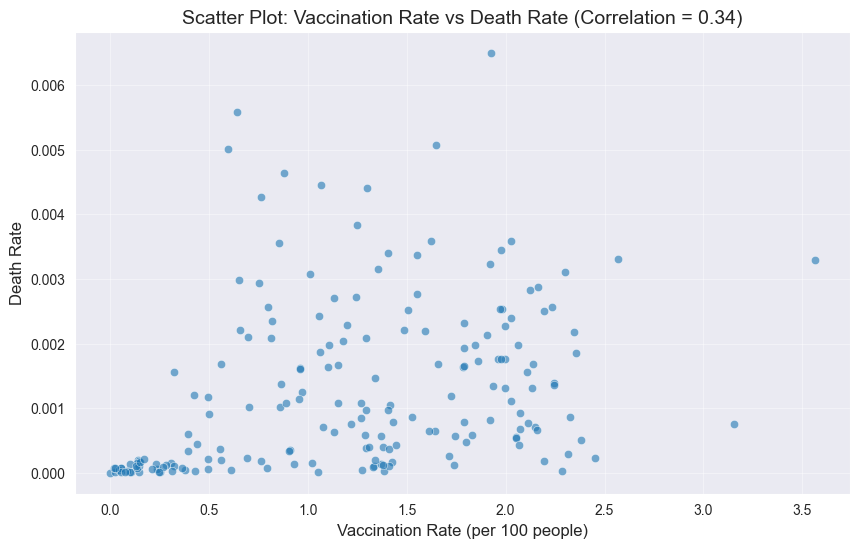

0.3381663851838189

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the relevant columns are named 'vaccination_rate' and 'death_rate'
# Calculating the correlation coefficient
correlation = agg_df[['death_rate', 'Vaccination Rate']].corr().iloc[0, 1]

# Plotting a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=agg_df, x='Vaccination Rate', y='death_rate', alpha=0.6)
plt.title(f"Scatter Plot: Vaccination Rate vs Death Rate (Correlation = {correlation:.2f})", fontsize=14)
plt.xlabel("Vaccination Rate (per 100 people)", fontsize=12)
plt.ylabel("Death Rate", fontsize=12)
plt.grid(alpha=0.4)

# Displaying the plot
plt.show()

# Outputting the correlation for further interpretation
correlation


Na podstawie Twojego wykresu:

Współczynnik korelacji wynosi około 0.34 – wskazuje to na umiarkowaną dodatnią zależność pomiędzy wskaźnikiem szczepień a wskaźnikiem śmiertelności. To oznacza, że wyższe wskaźniki szczepień są nieznacznie powiązane z wyższymi wskaźnikami śmiertelności w Twoich danych.

Interpretacja:

Może to być paradoksalne i może wynikać z innych czynników, takich jak:
Kraj o wysokim wskaźniku szczepień mógł wcześniej zmagać się z dużą liczbą zgonów, co skłoniło go do zwiększenia kampanii szczepień.
Zależność ta może wynikać z ograniczeń danych (np. liczby testów, wieku populacji, stanu opieki zdrowotnej).
Sama korelacja nie oznacza przyczynowości – szczepienia mogą być jednym z wielu czynników wpływających na wskaźnik śmiertelności.
Porównanie z poprzednim wynikiem (0.07):

Możliwe, że różnica wynika z innego zakresu danych, sposobu agregacji lub użycia innych wskaźników.
Jeśli chcesz, możemy przeanalizować różnice w Twoim podejściu lub uwzględnić dodatkowe zmienne, aby lepiej zrozumieć dane.

In [124]:

agg_df['Total Cases'] = agg_df['Total Cases'].str.replace(',', '').astype(float)
agg_df['Total Cases Rate %'] = (agg_df['Total Cases'] / agg_df['Population']) / 100
agg_df

country  total_vaccinations  people_vaccinated  \
0          Afghanistan             5751015            5082824   
1              Albania             2754244            1278902   
2              Algeria            13704895            7461932   
3              Andorra              151997              57817   
4               Angola            17535411           11235059   
..                 ...                 ...                ...   
218              Wales             6927437            2528664   
219  Wallis and Futuna               13073               6483   
220              Yemen              807502             643501   
221             Zambia             3402612            2829929   
222           Zimbabwe             9039729            5053114   

     people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                    4420127                   13742             5741998   
1                    1215199                 1417691             2748980   
2                    6110712                  170786            13697360   
3                      53367                    4802              151499   
4                    5993792                       0            17435547   
..                       ...                     ...                 ...   
218                  2399341                 6827978             6859138   
219                     6457                       0               12538   
220                   404781                       0              794952   
221                  2182849                 1395616             3367782   
222                  3510256                 8209882             8754303   

     total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             14.44                          12.76   
1                             95.87                          44.52   
2                             30.72                          16.72   
3                            196.50                          74.74   
4                             51.68                          33.11   
..                              ...                            ...   
218                          218.53                          79.77   
219                          117.84                          58.44   
220                            2.65                           2.11   
221                           17.98                          14.96   
222                           59.90                          33.48   

     people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  ...  \
0                                  11.10                      366.763359  ...   
1                                  42.30                     2184.547945  ...   
2                                  13.70                      759.799505  ...   
3                                  68.99                     4753.648058  ...   
4                                  17.66                     1320.856041  ...   
..                                   ...                             ...  ...   
218                                75.69                     4895.407240  ...   
219                                58.20                     3054.529730  ...   
220                                 1.33                       83.797428  ...   
221                                11.54                      509.988539  ...   
222                                23.26                     1435.762376  ...   

               Country Total Cases Total Deaths Total Recovered Active Cases  \
0          Afghanistan    208545.0       7882.0         186,088       14,575   
1              Albania    334167.0       3595.0         328,951        1,621   
2              Algeria    271378.0       6881.0         182,749       81,748   
3              Andorra     47839.0        165.0          47,563          111   
4               Angola    105184.0       1931.0         103,216           37   
..                 ...     

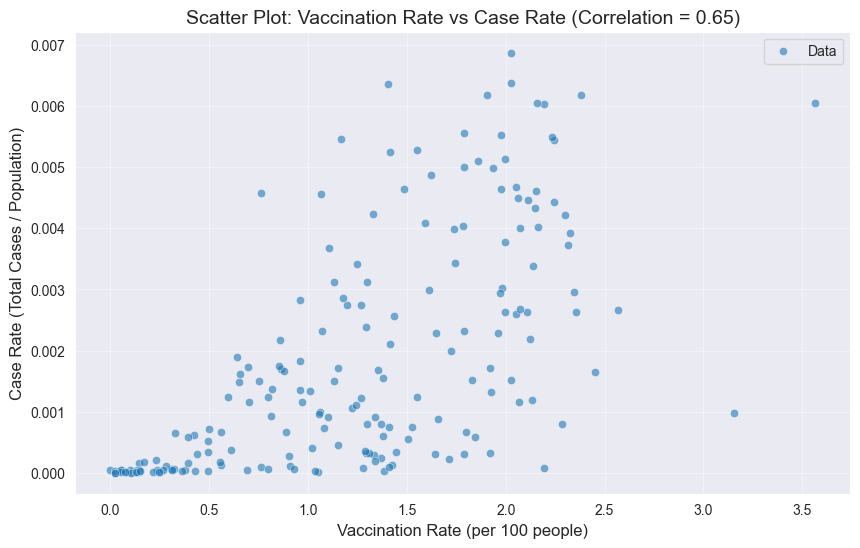

0.647809340751345

In [129]:
plt.figure(figsize=(10, 6))
case_correlation = agg_df[['Vaccination Rate', 'Total Cases Rate %']].corr().iloc[0, 1]

sns.scatterplot(x=agg_df['Vaccination Rate'],
                y=agg_df['Total Cases Rate %'], alpha=0.6, label="Data")
plt.title(f"Scatter Plot: Vaccination Rate vs Case Rate (Correlation = {case_correlation:.2f})", fontsize=14)
plt.xlabel("Vaccination Rate (per 100 people)", fontsize=12)
plt.ylabel("Case Rate (Total Cases / Population)", fontsize=12)
plt.grid(alpha=0.4)

# Display the plot
plt.show()

# Output the correlation coefficient for interpretation
case_correlation

In [137]:
# // corr only numeric_columns

numeric_columns = agg_df.select_dtypes(include='number').columns

agg_df[numeric_columns].corr()

total_vaccinations  people_vaccinated  \
total_vaccinations                             1.000000          -0.105803   
people_vaccinated                             -0.105803           1.000000   
people_fully_vaccinated                       -0.172873           0.997382   
daily_vaccinations_raw                         0.995233          -0.134516   
daily_vaccinations                             0.999990          -0.107657   
total_vaccinations_per_hundred                 0.011455           0.117715   
people_vaccinated_per_hundred                  0.043014           0.134779   
people_fully_vaccinated_per_hundred            0.021000           0.125521   
daily_vaccinations_per_million                -0.004607           0.040370   
population                                     0.010951           0.984433   
Vaccination Rate                               0.008628           0.128272   
Serial Number                                 -0.204305          -0.202956   
Total Cases                                    0.468619           0.381647   
Total Deaths                                   0.481410           0.404888   
Population                                     0.976942           0.985368   
death_rate                                    -0.017290          -0.033431   
Death Rate %                                  -0.017290          -0.033431   
Total Cases Rate %                            -0.077736          -0.091384   

                                     people_fully_vaccinated  \
total_vaccinations                                 -0.172873   
people_vaccinated                                   0.997382   
people_fully_vaccinated                             1.000000   
daily_vaccinations_raw                             -0.201009   
daily_vaccinations                                 -0.174716   
total_vaccinations_per_hundred                      0.125067   
people_vaccinated_per_hundred                       0.138253   
people_fully_vaccinated_per_hundred                 0.131946   
daily_vaccinations_per_million                      0.045922   
population                                          0.972157   
Vaccination Rate                                    0.135938   
Serial Number                                      -0.195666   
Total Cases                                         0.358922   
Total Deaths                                        0.375923   
Population                                          0.981880   
death_rate                                         -0.025151   
Death Rate %                                       -0.025151   
Total Cases Rate %                                 -0.084014   

                                     daily_vaccinations_raw  \
total_vaccinations                                 0.995233   
people_vaccinated                                 -0.134516   
people_fully_vaccinated                           -0.201009   
daily_vaccinations_raw                             1.000000   
daily_vaccinations                                 0.995492   
total_vaccinations_per_hundred                     0.009467   
people_vaccinated_per_hundred                      0.036079   
people_fully_vaccinated_per_hundred                0.017349   
daily_vaccinations_per_million                    -0.002181   
population                                        -0.019896   
Vaccination Rate                                   0.005844   
Serial Number                                     -0.174307   
Total Cases                                        0.455835   
Total Deaths                                       0.467905   
Population                                         0.964365   
death_rate                                         0.004934   
Death Rate %                                       0.004934   
Total Cases Rate %                                -0.048976   

                                     daily_vaccinations  \
total_vaccinations                             0.999990   
people_vaccinated    

In [139]:

agg_df['Total Test'] = agg_df['Total Test'].str.replace(',', '').astype(float)
agg_df['Cases Rate by Tests %'] = (agg_df['Total Cases'] / agg_df['Total Test']) / 100
agg_df['Deaths Rate by Tests %'] = (agg_df['Total Deaths'] / agg_df['Total Test']) / 100

TypeError: unsupported format string passed to DataFrame.__format__

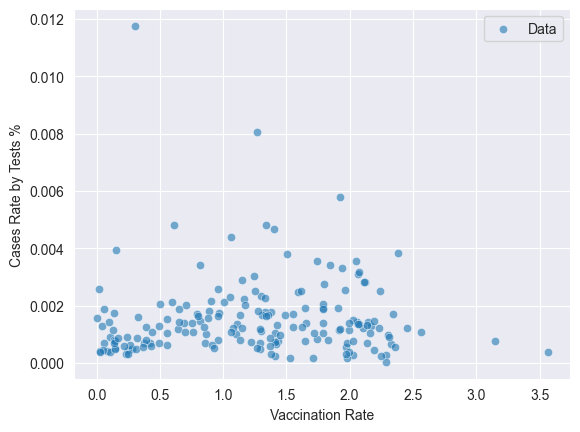

In [144]:
cases_tests_corr = agg_df[['Vaccination Rate', 'Cases Rate by Tests %']].corr()
deaths_tests_corr = agg_df[['Vaccination Rate', 'Deaths Rate by Tests %']].corr()

# Display correlations for verification
sns.scatterplot(x=agg_df['Vaccination Rate'],
                y=agg_df['Cases Rate by Tests %'], alpha=0.6, label="Data")
plt.title(f"Scatter Plot: Vaccination Rate vs Cases Rate by Tests % (Correlation = {cases_tests_corr:.2f})",
          fontsize=14)
plt.xlabel("Vaccination Rate", fontsize=12)
plt.ylabel("Cases Rate by Tests % ", fontsize=12)
plt.grid(alpha=0.4)

plt.show()



TypeError: unsupported format string passed to DataFrame.__format__

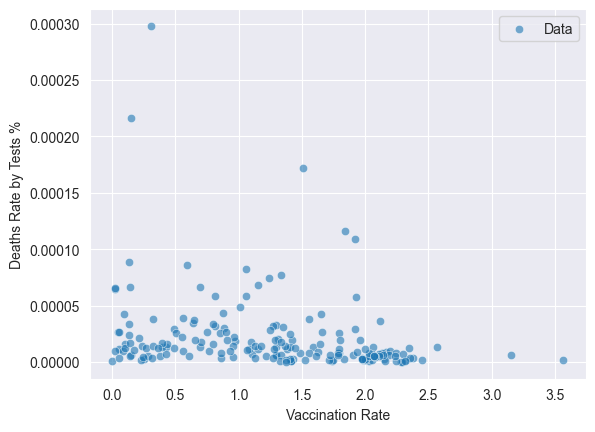

In [145]:
sns.scatterplot(x=agg_df['Vaccination Rate'],
                y=agg_df['Deaths Rate by Tests %'], alpha=0.6, label="Data")
plt.title(f"Scatter Plot: Vaccination Rate vs Deaths Rate by Tests % (Correlation = {deaths_tests_corr:.2f})",
          fontsize=14)
plt.xlabel("Vaccination Rate", fontsize=12)
plt.ylabel("Deaths Rate by Tests %", fontsize=12)
plt.grid(alpha=0.4)

plt.show()

In [150]:
population_df = pd.read_csv('data/world_population.csv')
# population_df = population_df[['Area (km²)']]
population_df.rename(columns={'Area (km²)': 'Area'}, inplace=True)
agg_df = pd.merge(agg_df, population_df, left_on='country', right_on='Country/Territory', how='left')

In [152]:
agg_df['Population Density'] = agg_df['population'] / agg_df['Area']

In [158]:
agg_df[['country', 'population', 'Population Density', 'Vaccination Rate', 'Cases Rate by Tests %',
        'Deaths Rate by Tests %', 'Total Deaths', 'Total Cases', 'Total Test']]

country  population  Population Density  Vaccination Rate  \
0          Afghanistan  41128771.0           63.058692          0.139829   
1              Albania   2842321.0           98.870217          0.969012   
2              Algeria  44903225.0           18.853110          0.305210   
3              Andorra     79824.0          170.564103          1.904152   
4               Angola  35588987.0           28.546552          0.492720   
..                 ...         ...                 ...               ...   
218              Wales         NaN                 NaN               NaN   
219  Wallis and Futuna     11572.0           81.492958          1.129710   
220              Yemen  33696614.0           63.823213          0.023964   
221             Zambia  20017675.0           26.597603          0.169980   
222           Zimbabwe  16320537.0           41.766461          0.553887   

     Cases Rate by Tests %  Deaths Rate by Tests %  Total Deaths  Total Cases  \
0                 0.001754                0.000066        7882.0     208545.0   
1                 0.001722                0.000019        3595.0     334167.0   
2                 0.011755                0.000298        6881.0     271378.0   
3                 0.001915                0.000007         165.0      47839.0   
4                 0.000701                0.000013        1931.0     105184.0   
..                     ...                     ...           ...          ...   
218                    NaN                     NaN           NaN          NaN   
219               0.001671                0.000003           7.0       3427.0   
220               0.000362                0.000066        2159.0      11945.0   
221               0.000881                0.000010        4047.0     340763.0   
222               0.001036                0.000022        5652.0     261606.0   

     Total Test  
0     1188898.0  
1     1941032.0  
2      230861.0  
3      249838.0  
4     1499795.0  
..          ...  
218         NaN  
219     20508.0  
220    329592.0  
221   3865993.0  
222   2525756.0  

[223 rows x 9 columns]

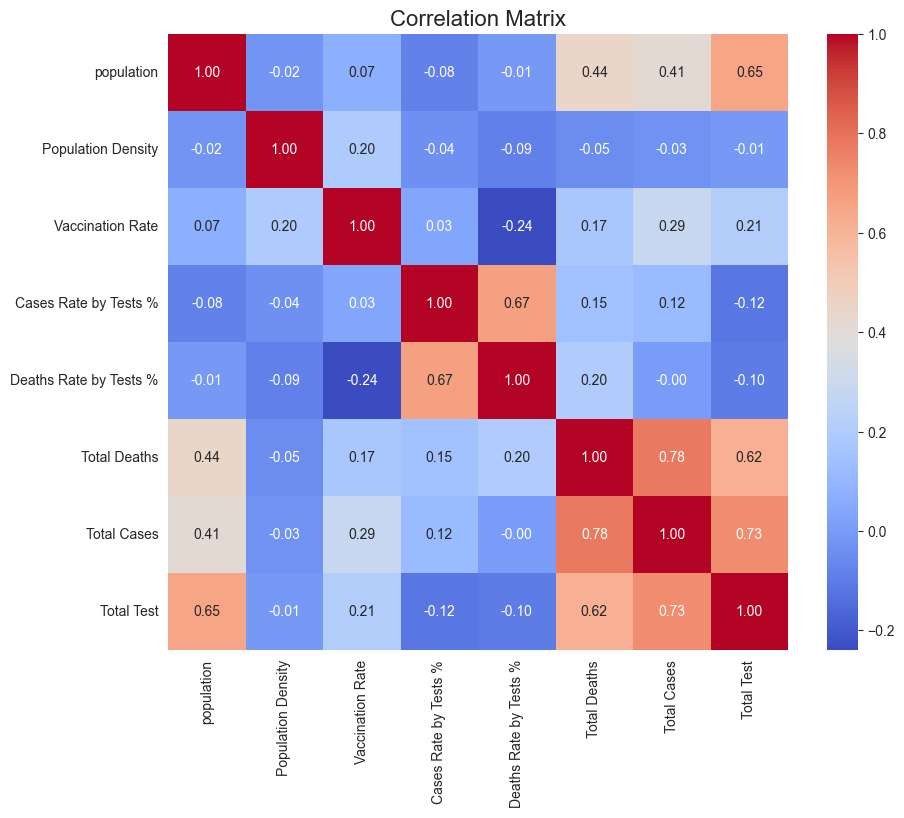

In [161]:
requested_columns = ['population', 'Population Density', 'Vaccination Rate', 'Cases Rate by Tests %',
                     'Deaths Rate by Tests %', 'Total Deaths', 'Total Cases', 'Total Test']

correlation_data = agg_df[requested_columns]
correlation_matrix2 = correlation_data.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [166]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = agg_df[
    ['population', 'Population Density', 'Vaccination Rate', 'Cases Rate by Tests %', 'Total Cases', 'Total Test']]
y = agg_df['Total Deaths']

X = X.dropna()
y = y[X.index]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = sm.OLS(y_train, X_train).fit()


In [167]:
print(model.summary())
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

                            OLS Regression Results                            
Dep. Variable:           Total Deaths   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     40.32
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.20e-26
Time:                        12:48:56   Log-Likelihood:                -1578.4
No. Observations:                 128   AIC:                             3171.
Df Residuals:                     121   BIC:                             3191.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7111.69

ValueError: Input contains NaN.

In [170]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree

X = agg_df[
    ['population', 'Population Density', 'Vaccination Rate', 'Cases Rate by Tests %', 'Total Cases', 'Total Test']]
y = agg_df['Total Deaths'].fillna(
    0
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

plt.figure(figsize=(200, 100))
tree.plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

Mean Squared Error (MSE): 5049183532.605655
R^2 Score: -0.6526238542559306
